
# Exercise 1




## Exercise 1A



Create a function to load your stock data into Python.

There are many ways of importing data into Python.
Some are low-level and require you to manage each line of a file, while others are high-level and extract data from commonly used files, like `.csv` files.

To open a file for reading in Python we use the built-in function `open`. It takes the path to the file as an argument. The `open` function also takes as argument the mode to open the file, in this case we want Python to read the file, as opposed to write to the file.

After opening the file, we will get a file handle, which has a method that reads an entire line and returns it a string. We can then parse this string to obtain the values we need.
We can repeat this process on all lines of the file to extract all the data from the file.

This process is necessary when the formatting of our file is not-standard, or we want to process the data (check for errors, for example) as we read it.
However, reading the `.csv` files we use are quite standard, and we can use one of many high-level functions to extract the data from it.

One of those functions is `numpy.loadtxt`.
Read the documentation [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.loadtxt.html).
Use this function to load the data for your stocks.



### Answer: 
I import the dataset `SPY` by creating a `importStock` function which specifies the format of each column in the dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

dtype={'names': ('date', 'time', 'price'), 'formats': ('int_', 'int_', 'float_')}

def importStock(path):
    return np.loadtxt(path,dtype=dtype,delimiter = ',')

data = importStock('Data/SPY.csv')


### (OPTIONAL) Exercise 1A Alternative



As an ****optional**** exercise, use the `open` built-in to load the data into numpy arrays.
Here is a bare bones of how you would do that:



In [2]:
def importStock(path):
    date, time, price = [], [], []
    with open(path, 'r') as csv:
        for line in csv:
            # process line
            date[line] = csv[line,1]
            time[line] = csv[line,2]
            prince[line] = csv[line,3]
            # append correct values to date, time and price lists
    # convert the lists to numpy arrays with the appropriate data types
    date = np.array(date, dtype='int_')
    time = np.array(time, dtype='int_')
    price = np.array(price, dtype='float_')
    return date, time, price

The `with` statement in the function above does the job of opening and closing the file.
It first opens the file and then executes the code inside its block, after that code is done executing (in this case the `for` loop), then the file is automatically closed.
The file will also be closed even if there is an error processing it.
The `with` statement block is equivalent to the code below:




## Exercise 1B



Create a function that takes the date and time data you just imported and generates a `datetime.datetime` array (much like the Matlab serial date format). This format is used to get the correct axis labels when plotting.

You can read more about `datetime.datetime` objects [here](https://docs.python.org/3.6/library/datetime.html#datetime-objects).

First, import the `datetime` class from the `datetime` module (the module name is the same as the class name):



In [2]:
from datetime import datetime

We can now create a datetime instance by calling the `datetime` function with the arguments:
`datetime(year, month, day, hour, minute, second)`.
The time arguments (hour, minute and second) are optional, and if are not given will default to 0.
Since we are using intraday data, we will also provide those values.

Our data has dates in the format YYYYMMDD, like 20070801.
We need to split these integers to get the year, month and day information out of them.
There are many ways of doing that, for example:



In [4]:
a_date = 20070801
a_date_str = str(a_date)
year = int(a_date_str[:4])
month = int(a_date_str[4:6])
day = int(a_date_str[6:])
print(year, month, day)

2007 8 1


You can do the same for the time information, like 935:



In [272]:
a_time = 935
a_time_str = str(a_time)
hour = int(a_time_str[:-2])
minute = int(a_time_str[-2:])
print(hour, minute)

9 35


We can combine the date and time information into the `datetime` object:



In [273]:
dt = datetime(year, month, day, hour, minute)
print(dt)

2007-08-01 09:35:00


You now should be able to create a function that combines dates and times into an array of `datetime` objects.
You do not have to follow what I did above. You could use integer division to recover the values, and that might be faster.



### Answer:
I created a `getDatatime` function which used integer division to obtain the `datatime` objects.

In [3]:
def getDatetime(data):
    # create an empty array
    dt = np.array([])
    for i in range(0,len(data)):
        #obtain the date and the time
        date = data['date']
        time = data['time']
        #separate the year/month/day/hour/minute apart for the ith element in 'date' and 'time'
        year = int(date[i]/10000)
        month = int(date[i]/100) - int(date[i]/10000)*100
        day = int(date[i] - year*10000 - month*100)
        hour = int(time[i]/100)
        minute = int(time[i] - hour*100)
        #use these numbers above to compute a `datatime` object
        temp = datetime(year,month,day,hour,minute)
        #print the object
        #print(temp)
        #add this object to the array
        dt = np.append(dt,temp)
    return dt
# return an array of datetimes
dt = getDatetime(data)
print(dt)

[datetime.datetime(2007, 1, 3, 9, 35) datetime.datetime(2007, 1, 3, 9, 40)
 datetime.datetime(2007, 1, 3, 9, 45) ...
 datetime.datetime(2017, 12, 29, 15, 50)
 datetime.datetime(2017, 12, 29, 15, 55)
 datetime.datetime(2017, 12, 29, 16, 0)]


As an ****optional**** exercise, compare the speed of converting to datetime using integer division and using the string conversion suggested above.




## Exercise 1C



Create a function that computes the intraday geometric returns (log-returns) given the prices, the number of prices in a day and the number of days in the data.
Remember that we have $N=78$ prices per day over $T=2769$ days.

You may want to use the `numpy.ndarray.reshape` method. Also check `numpy.log` and `numpy.diff`.
The documentation for reshape is [here](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.ndarray.reshape.html?highlight=reshape#numpy-ndarray-reshape), and you can use the search box to find the documentation for the other functions.



### Answer:
By using the `numpy.ndarray.reshape` method, the price array is reshaped to a T-by-N matrix. Then, a return matrix is obtained by using the `numpy.log` and `numpy.diff`.

Below is the plot of the returns.

In [4]:
def getReturns(data, N, T):
    #reshpae the price data into a T-by-N matrix
    matrix = np.ndarray.reshape(data['price'],(T,N),order = 'C')
    #obtain the log-price
    logprice = np.log(matrix)
    #take the difference of log-price to get returns
    ret = np.diff(logprice)
    return ret
#assign values to N and T
N = 78
T = 2769
#obtain the returns
ret = getReturns(data, 78, 2769)
#The shape of the returns matrix is 2769-by-77
print(ret.shape)

(2769, 77)


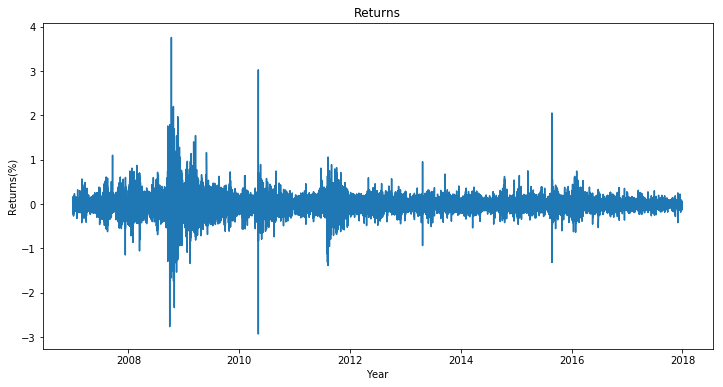

In [12]:
#obtain the datetime matrix for the returns
dt_ret = np.ndarray.reshape(dt,(T,N),order = 'C')[:,1:]
#reshape the matrices to a column
dt_ret_plt = np.ndarray.reshape(dt_ret,(T*(N-1),1),order='C')
ret_plt = np.ndarray.reshape(ret,(T*(N-1),1),order='C')
#plot the returns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(dt_ret_plt, ret_plt*100, alpha=1, label='Points: $(x,y)$')
ax.set(title='Returns',
       xlabel='Year',
       ylabel='Returns(%)')
plt.show()


## Exercise 1D



Create a function to compute the realized variance out of the intraday returns for each day.
Remember that the usual opearations happen element wise in numpy, and that the symbol `**` is the exponent operator.



### Answer:
Since the returns are a T-by-n matrix, RV is the sum of squared entries on each row of this matrix.

Below is the plot of the realized volatility.

In [14]:
def getRV(ret):
    # compute RVs
    ret_sq = ret**2
    RV = np.sum(ret_sq, axis=1)
    return RV
RV = getRV(ret)

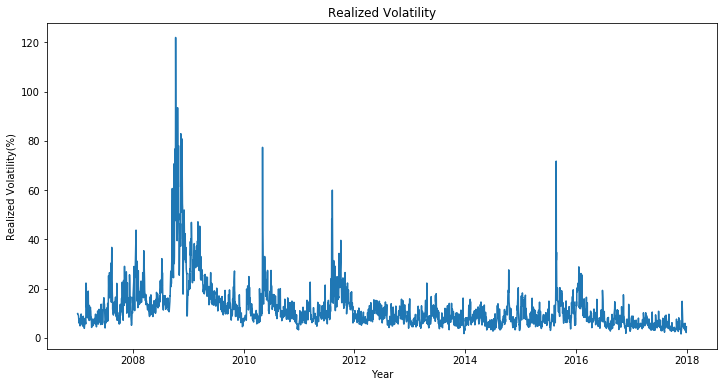

In [20]:
#obatin a datetime object array that responds to the RV array.
dt_time_plt = dt[range(0,N*T,N)]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(dt_time_plt, 100*np.sqrt(252*RV), alpha=1, label='Points: $(x,y)$')
ax.set(title='Realized Volatility',
       xlabel='Year',
       ylabel='Realized Volatility(%)')
plt.show()


## Exercise 1E



Create a function to compute the bipower variance for each day.



### Answer:
I obtained the BV based on the formula $BV = \frac{\pi}{2} \times \sum{|r_n r_{n-1}|}$.

Below is the plot of the bipower volatility.

In [40]:
def getBV(ret):
    # compute BVs
    n = N-1
    BV = np.zeros(T)
    for t in range(0,T):
        ls = np.zeros(n-1)
        for i in range(1,n-1):
            ls[i-1] = abs(ret[t-1,i]*ret[t-1,i-1])
        BV[t] = np.pi/2 * np.sum(ls)
    return BV

BV = getBV(ret)
#check the shape of the bipower variance
print(BV.shape)

(2769,)


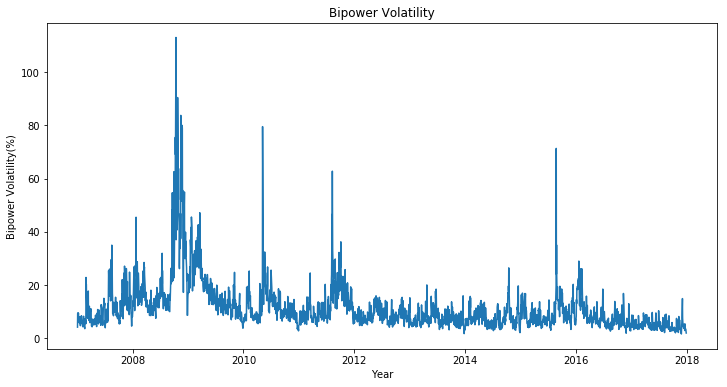

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(dt_time_plt, 100*np.sqrt(252*BV), alpha=1, label='Points: $(x,y)$')
ax.set(title='Bipower Volatility',
       xlabel='Year',
       ylabel='Bipower Volatility(%)')
plt.show()


## Exercise 1F



Create a function to find the time of day factor for each day.



### Answer:
Below is the plot of the time-of-day factor which decreases in the morning and increases in the afternoon.

In [24]:
def getTOD(ret):
    # compute time of day factor
    n = len(ret[1,:])
    T = len(ret[:,1])
    tau = np.zeros(n)
    for i in range(1,n):
        ls = np.zeros(T)
        for t in range(0,T):
            ls[t] = abs(ret[t,i]*ret[t,i-1])
        tau[i] = np.sum(ls)/T
    tau[0] = tau[1]
    tod = tau/(1/n * np.sum(tau))
    return tod

tod = getTOD(ret)
#check the shape of time-of-day factor
print(tod.shape)

(77,)


In [9]:
import matplotlib.dates as mpd

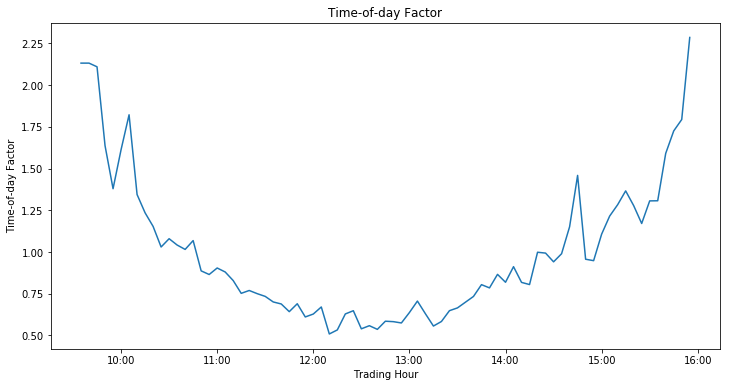

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(dt[0:77], tod, alpha=1, label='Points: $(x,y)$')
myFmt = mpd.DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)
ax.set(title='Time-of-day Factor',
       xlabel='Trading Hour',
       ylabel='Time-of-day Factor')
plt.show()


## Exercise 1G



Create a function that computes the diffusive and jump returns.



### Answer:
My first step to separate the jump returns from the diffusive returns is computing the thresholds based on the time-of-day factors obtained above. The following step is classifying the returns within the thresholds as the diffusive returns and the rest as the jump returns.

Below are the plots for the continuous returns and the jump returns.

In [33]:
def separateReturns(ret, alpha=5):
    # compute jump threshold
    T, n = ret.shape
    cut = np.zeros((n*T, 1))    
    BV = getBV(ret)
    tod = getTOD(ret)
    
    #obtain the thresholds for rc and rd
    for t in range(0,T):
        for i in range(0,n):
            cut[i+(t-1)*n] = alpha* (1/n)**0.49 * (BV[t]*tod[i])**0.5
    ret_ls = np.ndarray.reshape(ret,(n*T,1))
    # separate diffusive from jump returns
    rc = np.zeros(ret_ls.shape)
    rd = np.zeros(len(ret_ls))
    
    for i in range(0,len(ret_ls)):
        if np.abs(ret_ls[i]) <= cut[i]:
            rc[i] = ret_ls[i]
        else:
            rd[i] = ret_ls[i]
            
    # return diffusive and jump returns
    return rc, rd

rc, rd = separateReturns(ret)

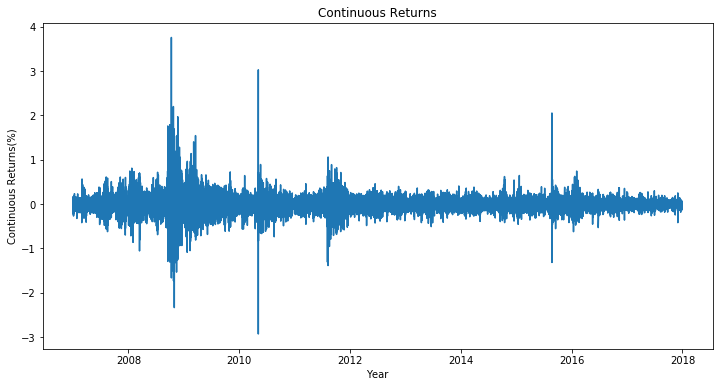

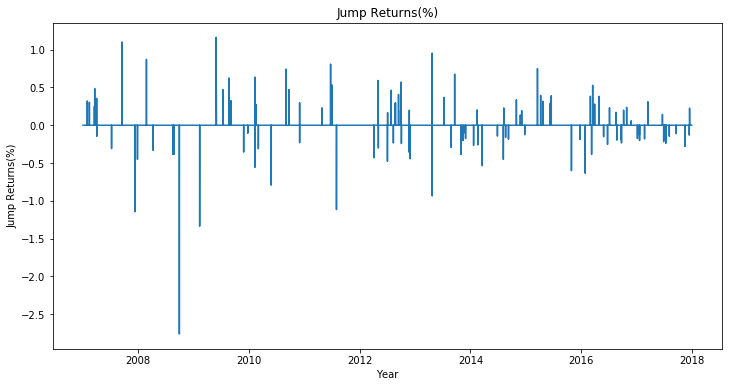

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(dt_ret_plt, rc*100, alpha=1, label='Points: $(x,y)$')
ax.set(title='Continuous Returns',
       xlabel='Year',
       ylabel='Continuous Returns(%)')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(dt_ret_plt, rd*100, alpha=1, label='Points: $(x,y)$')
ax.set(title='Jump Returns(%)',
       xlabel='Year',
       ylabel='Jump Returns(%)')
plt.show()


## Exercise 1H



Create a function to compute the integrated quarticity.



### Answer:
I obtained the QIV based on the formula $QIV = \frac{1}{3 \times 1/n} \sum^{n}_{i=1}{r_{c_{t,i}}^4}$.

In [41]:
def getQIV(rc):
    # compute QIV
    n = len(ret[1,:])
    T = len(ret[:,1])
    rc_list = np.ndarray.reshape(rc,(T,n))
    QIV = 1/(3*1/n)*np.sum(rc_list**4, axis = 1)
    return QIV
QIV = getQIV(rc)
#check the shape of QIV. A vector with 2769 elements.
print(QIV.shape)

(2769,)



# Exercise 2




## Exercise 2A



We want to compare the forecast errors of the AR, HAR and No Change models to the forecast error of a neural network model.
Let's construct what will be the input of these models by creating then matrix below:

\begin{align*}
\begin{pmatrix}
1 & \text{RV}_{22} & \text{RV}_{22}^w & \text{RV}_{22}^m & \widehat{QIV}_{22}^{1/2}\text{RV}_{22}\\
1 & \text{RV}_{23} & \text{RV}_{23}^w & \text{RV}_{23}^m & \widehat{QIV}_{23}^{1/2}\text{RV}_{23}\\
\vdots & \vdots\\
1 & \text{RV}_{T} & \text{RV}_{T}^w & \text{RV}_{T}^m & \widehat{QIV}_{T}^{1/2}\text{RV}_{T}
\end{pmatrix}
\end{align*}

where $T=2769$ is the total number of days.

First, generate $\text{RV}^w$ and $\text{RV}^m$ from the realized variances. Then create the matrix above.
Notice that we have $2769$ days in total, this means the first index of the $\text{RV}$'s is $1$, but on Python the index of an array starts at $0$, so when we actually create the matrix above we need to be careful with the first index.



### Answer:
I created a 2748-by-5 matrix filled with ones. Then, I fill the second to the fifth columns with $RV$, $RV^w$, $RV^m$, and $\widehat{QIV}_{T}^{1/2}RV$ respectively.

In [43]:
def getRVWeek(RV):
    # compute all RVw
    RVw = np.zeros(len(RV))
    for i in range(4,len(RV)):
        RVw[i] = 1/5 * sum(RV[i-4:i+1])
    return RVw

def getRVMonth(RV):
    # compute all RVm
    RVm = np.zeros(len(RV))
    for i in range(21,len(RV)):
        RVm[i] = 1/22 * sum(RV[i-21:i+1])
    return RVm

#obtain all RVw and RVm
RVw = getRVWeek(RV)
RVm = getRVMonth(RV)

#fill each column of model_input with its corresponding variables
model_input = np.ones((T-22+1, 5), dtype='float_')
model_input[:, 1] = RV[21:]
model_input[:, 2] = RVw[21:]
model_input[:, 3] = RVm[21:]
model_input[:, 4] = QIV[21:]**0.5 *RV[21:]

#check the shape of model_input. A 2748-by-5 matrix
print(model_input.shape)

(2748, 5)



## Exercise 2B



Implement a rolling window scheme using 1000 data points to compute the 1-step ahead forecast for the models:

-   No Change
-   AR(1)
-   HAR(1)
-   ARQ(1)
-   HARQ(1)

Run the rolling scheme over all data and obtain the mean squared error of each model.
Create a table with the results.



In [45]:
def OLS(Y, X):
    # return beta estimate from OLS
    # np.linalg.inv computes the inverse of a matrix
    # remember that in numpy * is elementwise multiplication
    # the symbol for matrix multiplication is @, as in X.T@X
    # X.T is the tranpose of X
    OLS_beta = np.zeros(len(X[1,:]))
    OLS_beta = np.linalg.inv(X.T @ X) @ (X.T @ Y)
    return OLS_beta

In [46]:
def forecastError(Y, X, Y_next, X_next):
    # computes the forecast error
    # estimate beta
    # forecast y
    OLS_beta = OLS(Y,X)
    Y_forecast = X_next @ OLS_beta
    #sanity filter
    if Y_forecast > np.max(Y) or Y_forecast < np.min(Y):
        Y_forecast = np.mean(Y)
    return (Y_next - Y_forecast)**2

In [47]:
error = {'AR1': 0.0, 'HAR1': 0.0, 'ARQ1': 0.0, 'HARQ1': 0.0, 'NoChange': 0.0}
window_size = 1000
# rolling window + 1-step-ahead forecast
for S in range(window_size,len(model_input)-1):
    window_x = slice(S - window_size, S)
    window_y = slice(S - window_size + 1, S + 1)
    # AR(1)
    error['AR1'] += forecastError(model_input[window_y,1],
                                  model_input[window_x,:2],
                                  model_input[S+1,1],
                                  model_input[S,:2])
    # HAR(1)
    error['HAR1'] += forecastError(model_input[window_y,1],
                                   model_input[window_x,:4],
                                   model_input[S+1,1],
                                   model_input[S,:4])
    # ARQ(1)
    index = [0,1,4]
    error['ARQ1'] += forecastError(model_input[window_y,1],
                                   model_input[window_x,index],
                                   model_input[S+1,1],
                                   model_input[S,index])
    # HARQ(1)
    error['HARQ1'] += forecastError(model_input[window_y,1],
                                    model_input[window_x,:],
                                    model_input[S+1,1],
                                    model_input[S,:])
    # No Change
    error['NoChange'] += (model_input[S+1,1]-model_input[S,1])**2

### Answer: 
Below is the table of the regression results. MSEs have been multiplied by $10^9$.

As the table shows, ARQ is the best model in terms of MSE. NoChange is the worst model with the highest MSE.

In [48]:
# compute and print MSE
total = len(model_input) - window_size - 1
print("{:^10}|{:^10}".format('Model','MSE'))
print(f"{'-'*21}")
[print(f'{model:^10}|{10**9 * value/total:^10.8f}') for model, value in error.items()]
print(f"{'-'*21}")

  Model   |   MSE    
---------------------
   AR1    |5.48173638
   HAR1   |5.25339822
   ARQ1   |4.16269877
  HARQ1   |4.22224674
 NoChange |5.64875798
---------------------



## Exercise 2C



The absolute values of the MSE are quite small.
To make the comparison easier, create a table with the MSE of each model divided by the MSE of the "No Change" model.
Does any of the models beat the "No Change" model? If they do, then by how much?



### Answer:
From the table below, we can find that the AR, HAR, ARQ and HARQ models perform better than the NoChange model. Particularly, the ARQ and HARQ models' MSEs are nearly 30% lower than the NoChange model's. But the AR and HAR models' MSEs are nearly 3% and 7% lower the NoChange model's respectively.

In [230]:
# the absolute values of the MSE are very small and difficult to compare
# report the MSE relative to the MSE of the NoChange Model
total = len(model_input) - window_size
print("{:^10}|{:^20}".format('Model', 'Relative MSE'))
print(f"{'-'*31}")
[print(f'{model:^10}|{value/error["NoChange"]:^20.6f}')
 for model, value in error.items()]
print(f"{'-'*31}")

  Model   |    Relative MSE    
-------------------------------
   AR1    |      0.970432      
   HAR1   |      0.930009      
   ARQ1   |      0.736923      
  HARQ1   |      0.747465      
 NoChange |      1.000000      
-------------------------------



## (OPTIONAL) Exercise 2D



Compute the MSE and relative MSE for all stocks available to you using the 5 minute data.
Use only the stocks for which $T=2769$ days of data are available.
Report the results in a table below.
Is there a model that is consistently better than other models?
How does the No Change model perform overall?
What about HARQ1?
Compute the average of the MSEs across all stocks, is there a clear winner? If so, by how much?




# Exercise 3



In this exercise we will build, train and compute forecast errors from a neural network.
In order to compare the neural network model to the previous models, we will use the same rolling window scheme with 1-step ahead quasi-out-of-sample forecasting.
Since neural networks take much longer to "train" (estimate the parameters), this entire process is quite slow and will take several hours for your computer to finish running. Therefore, it is important to first make sure everything is working for a single window, and then letting the code run for all windows.




## Exercise 3A



Use tensorflow to build the graph of a neural network all the way from the input (x) to the output of the model (y).
The network should:

-   Take as input the same inputs of the HARQ(1) model (1, RV, RVw, RVm, RQ correction);
-   Be able to take as many inputs as need be (we can pass in a single row of RVs, or many rows at the same time);
-   Have 1 hidden layer, and 2 layers in total:
    -   First layer: 5 inputs and 10 outputs (10 signals, use `tf.nn.relu` as the activation function)
    -   Second Layer: 10 inputs, 1 output (no activation function)



### Answer:

By building the graph of a two-layer neural network, I can use this graph to update the weights (W1 and W2) and to make predictions.

In [50]:
import tensorflow as tf

In [51]:
# get default graph
tf.reset_default_graph()
graph = tf.get_default_graph()
# create model input (x) and model output (x)
x = tf.placeholder(tf.float32, [None, 5])
y = tf.placeholder(tf.float32, [None, 1])
# create hidden layer
W1 = tf.Variable(tf.abs(tf.random_normal([5,10])))
S1 = tf.nn.relu(tf.matmul(x,W1))
# create last layer
W2 = tf.Variable(tf.abs(tf.random_normal([10,1])))
#predict the y
y_model = tf.matmul(S1,W2)


## Exercise 3B



Given the ouput of the neural network, write the loss function:

\begin{align*}
\text{loss}(y,\hat{y})=\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2
\end{align*}

Also create the optimizer, you can use the Gradient Descent optimizer or `tf.train.AdamOptimizer` which improves upon it:
`train_one_step = tf.train.AdamOptimizer().minimize(loss)`.



### Answer:
The `loss` function below is the training error. The `train_one_step` uses the AdamOptimizer to minize the training error by updating the weights.

In [52]:
# create loss function
loss = tf.reduce_mean(tf.squared_difference(y,y_model))
# create optimizer
train_one_step = tf.train.AdamOptimizer().minimize(loss)


## Exercise 3C



Write a function that trains the neural network for a given window, and then outputs the forecast.
To train the network, use Gradient Descent (or Adam) over 50000 epochs.
Do not forget to create the initializer for the variables (`tf.Variable`) and initialize them inside the `Session`.



### Answer:
I created a `forecastNN` function, which updates the weights for 50,000 times based on 1,000 data and makes the prediction of the $1001^{th}$ data

In [259]:
#epoch should be 50000
def forecastNN(S, model_input, window_size=1000, epochs=50000, columns=5):
    # determine window size
    window_x = slice(S-window_size, S)
    window_y = slice(S-window_size+1, S+1)
    with tf.Session() as session:
        # initialize variables
        session.run(tf.global_variables_initializer())
        for i in range(epochs):
            _ = session.run(train_one_step, feed_dict={
                x:model_input[window_x,:],
                y:np.transpose([model_input[window_y,1]])
            })
            # do 1 step on gradient descent
            # print MSE every 500 epochs
            if i % 500 == 0:
                MSE_train = session.run(loss, feed_dict={
                    x:model_input[window_x,:],
                    y:np.transpose([model_input[window_y,1]])
                })
                print(f'MSE at step {i+1} is {MSE_train}',end = '\r')
        # model is done training, use it to forecast
        x_forecast = [model_input[S,:]]
        y_forecast = session.run(y_model, feed_dict={
            x:x_forecast
        })
        #sanity filter
        if y_forecast < min(model_input[window_y,1]) or y_forecast>max(model_input[window_y,1]):
            y_forecast=np.mean(model_input[window_y,1])
        return float(y_forecast)


## Exercise 3D



Use the rolling window scheme to compute the MSE for 1-step-ahead forecasts for the entire data.
Use a window size of a 1000 days and 50000 epochs to train each model.
Report the MSE for the neural network model.



### Answer:
Since running the neural network model is time-consuming, I let my laptop run the first 800 windows for one day and the rest for the next day. Below are the results. All cumulative Errors and MSEs have been multiplied by $10^9$.

As the table shows, the MSE of the Neural Network model is initially small; however, its value jumps to a much higher level in the $95^{th}$ window in which the forecast is largely different from the actual value. Afterwards, the MSE gradually decreases as the window moves day by day and it ends at 30.5074.

In [265]:
error["NN"] = 0
print("{:^10}|{:^10}|{:^10}|{:^20}|{:^10}".format(
    "Window", "Forecast", "Actual", "Cummulative Error", "MSE"))
window_size = 1000
for S in range(window_size,1800):
    y_forecast = forecastNN(S,model_input)
    # store error
    error['NN'] += (model_input[S + 1, 1] - y_forecast)**2
    # print message
    print(f'{S - window_size:^10}|{float(y_forecast):^10.6f}|{model_input[S + 1, 1]:^10.6f}'
          f'|{10**9*error["NN"]:^20.6f}|{10**9*error["NN"]/(S-window_size+1):^10.6f}')

  Window  | Forecast |  Actual  | Cummulative Error  |   MSE    
    0     | 0.000039 | 0.000015 |      0.563643      | 0.563643 
    1     | 0.000035 | 0.000045 |      0.667780      | 0.333890 
    2     | 0.000046 | 0.000035 |      0.787475      | 0.262492 
    3     | 0.000044 | 0.000021 |      1.310313      | 0.327578 
    4     | 0.000040 | 0.000061 |      1.779578      | 0.355916 
    5     | 0.000053 | 0.000027 |      2.413443      | 0.402241 
    6     | 0.000045 | 0.000020 |      3.016321      | 0.430903 
    7     | 0.000042 | 0.000021 |      3.489790      | 0.436224 
    8     | 0.000041 | 0.000037 |      3.501576      | 0.389064 
    9     | 0.000047 | 0.000034 |      3.671375      | 0.367138 
    10    | 0.000043 | 0.000015 |      4.448094      | 0.404372 
    11    | 0.000038 | 0.000015 |      4.977742      | 0.414812 
    12    | 0.000037 | 0.000027 |      5.077478      | 0.390575 
    13    | 0.000040 | 0.000048 |      5.132542      | 0.366610 
    14    | 0.000046 | 0.

   251    | 0.000039 | 0.000031 |    37560.724839    |149.050495
   252    | 0.000042 | 0.000018 |    37561.310975    |148.463680
   253    | 0.000038 | 0.000048 |    37561.419751    |147.879605
   254    | 0.000184 | 0.000045 |    37580.733439    |147.375425
   255    | 0.000048 | 0.000030 |    37581.049184    |146.800973
   256    | 0.000061 | 0.000031 |    37581.990451    |146.233426
   257    | 0.000046 | 0.000058 |    37582.136309    |145.667195
   258    | 0.000057 | 0.000025 |    37583.150851    |145.108691
   259    | 0.000047 | 0.000019 |    37583.895627    |144.553445
   260    | 0.000041 | 0.000012 |    37584.718421    |144.002753
   261    | 0.000039 | 0.000017 |    37585.176143    |143.454871
   262    | 0.000039 | 0.000023 |    37585.423099    |142.910354
   263    | 0.000037 | 0.000023 |    37585.602256    |142.369706
   264    | 0.000037 | 0.000028 |    37585.672701    |141.832727
   265    | 0.000039 | 0.000023 |    37585.934117    |141.300504
   266    | 0.000038 | 0.

   503    | 0.000022 | 0.000020 |    40319.460432    |79.998929 
   504    | 0.000028 | 0.000023 |    40319.488529    |79.840571 
   505    | 0.000029 | 0.000012 |    40319.791951    |79.683383 
   506    | 0.000024 | 0.000017 |    40319.849698    |79.526331 
   507    | 0.000027 | 0.000020 |    40319.888451    |79.369859 
   508    | 0.000028 | 0.000026 |    40319.889895    |79.213929 
   509    | 0.000031 | 0.000020 |    40319.994404    |79.058813 
   510    | 0.000027 | 0.000018 |    40320.071271    |78.904249 
   511    | 0.000025 | 0.000013 |    40320.233631    |78.750456 
   512    | 0.000023 | 0.000020 |    40320.237948    |78.596955 
   513    | 0.000026 | 0.000036 |    40320.329285    |78.444220 
   514    | 0.000034 | 0.000012 |    40320.831743    |78.292877 
   515    | 0.000022 | 0.000008 |    40321.046083    |78.141562 
   516    | 0.000021 | 0.000008 |    40321.198108    |77.990712 
   517    | 0.000022 | 0.000016 |    40321.233788    |77.840220 
   518    | 0.000024 | 0.

   755    | 0.000027 | 0.000056 |    45395.049357    |60.046362 
   756    | 0.000044 | 0.000070 |    45395.715119    |59.967920 
   757    | 0.000054 | 0.000027 |    45396.424961    |59.889743 
   758    | 0.000032 | 0.000070 |    45397.894194    |59.812772 
   759    | 0.000054 | 0.000022 |    45398.960828    |59.735475 
   760    | 0.000031 | 0.000054 |    45399.515891    |59.657708 
   761    | 0.000047 | 0.000097 |    45401.986955    |59.582660 
   762    | 0.000069 | 0.000052 |    45402.279286    |59.504953 
   763    | 0.000048 | 0.000086 |    45403.698402    |59.428925 
   764    | 0.000066 | 0.000019 |    45405.880333    |59.354092 
   765    | 0.000033 | 0.000028 |    45405.902349    |59.276635 
   766    | 0.000038 | 0.000011 |    45406.598862    |59.200259 
   767    | 0.000028 | 0.000018 |    45406.715562    |59.123328 
   768    | 0.000031 | 0.000023 |    45406.769083    |59.046514 
   769    | 0.000034 | 0.000019 |    45407.008190    |58.970141 
   770    | 0.000031 | 0.

In [267]:
print("{:^10}|{:^10}|{:^10}|{:^20}|{:^10}".format(
    "Window", "Forecast", "Actual", "Cummulative Error", "MSE"))
window_size = 1000
for S in range(1800,len(model_input)-1):
    y_forecast = forecastNN(S,model_input)
    # store error
    error['NN'] += (model_input[S + 1, 1] - y_forecast)**2
    # print message
    print(f'{S - window_size:^10}|{float(y_forecast):^10.6f}|{model_input[S + 1, 1]:^10.6f}'
          f'|{10**9*error["NN"]:^20.6f}|{10**9*error["NN"]/(S-window_size+1):^10.6f}')

  Window  | Forecast |  Actual  | Cummulative Error  |   MSE    
   800    | 0.000040 | 0.000017 |    45442.827836    |56.732619 
   801    | 0.000061 | 0.000012 |    45445.189590    |56.664825 
   802    | 0.000028 | 0.000015 |    45445.350576    |56.594459 
   803    | 0.000029 | 0.000016 |    45445.517696    |56.524276 
   804    | 0.000029 | 0.000055 |    45446.194269    |56.454900 
   805    | 0.000048 | 0.000056 |    45446.253834    |56.384930 
   806    | 0.000050 | 0.000041 |    45446.337380    |56.315164 
   807    | 0.000043 | 0.000026 |    45446.624787    |56.245823 
   808    | 0.000036 | 0.000069 |    45447.762645    |56.177704 
   809    | 0.000058 | 0.000073 |    45447.967087    |56.108601 
   810    | 0.000060 | 0.000041 |    45448.337138    |56.039873 
   811    | 0.000044 | 0.000084 |    45449.924712    |55.972814 
   812    | 0.000066 | 0.000034 |    45450.940881    |55.905216 
   813    | 0.000041 | 0.000023 |    45451.286083    |55.836961 
   814    | 0.000036 | 0.

   1051   | 0.000037 | 0.000012 |    45744.234999    |43.483113 
   1052   | 0.000019 | 0.000032 |    45744.413469    |43.441988 
   1053   | 0.000034 | 0.000053 |    45744.781054    |43.401121 
   1054   | 0.000050 | 0.000029 |    45745.193477    |43.360373 
   1055   | 0.000032 | 0.000021 |    45745.322733    |43.319434 
   1056   | 0.000026 | 0.000016 |    45745.424538    |43.278547 
   1057   | 0.000024 | 0.000049 |    45746.076969    |43.238258 
   1058   | 0.000046 | 0.000034 |    45746.233490    |43.197576 
   1059   | 0.000036 | 0.000008 |    45746.993222    |43.157541 
   1060   | 0.000016 | 0.000012 |    45747.012090    |43.116882 
   1061   | 0.000346 | 0.000027 |    45848.497421    |43.171843 
   1062   | 0.000030 | 0.000015 |    45848.748988    |43.131467 
   1063   | 0.000021 | 0.000015 |    45848.790154    |43.090968 
   1064   | 0.000022 | 0.000035 |    45848.956107    |43.050663 
   1065   | 0.000036 | 0.000012 |    45849.539926    |43.010825 
   1066   | 0.000019 | 0.

   1303   | 0.000034 | 0.000020 |    51748.240264    |39.684233 
   1304   | 0.000029 | 0.000015 |    51748.437670    |39.653975 
   1305   | 0.000029 | 0.000028 |    51748.437913    |39.623612 
   1306   | 0.000031 | 0.000018 |    51748.603693    |39.593423 
   1307   | 0.000029 | 0.000032 |    51748.613249    |39.563160 
   1308   | 0.000033 | 0.000031 |    51748.616479    |39.532938 
   1309   | 0.000033 | 0.000047 |    51748.797023    |39.502898 
   1310   | 0.000038 | 0.000033 |    51748.827370    |39.472790 
   1311   | 0.000035 | 0.000035 |    51748.827621    |39.442704 
   1312   | 0.000037 | 0.000040 |    51748.840665    |39.412674 
   1313   | 0.000038 | 0.000021 |    51749.141643    |39.382908 
   1314   | 0.000032 | 0.000017 |    51749.345358    |39.353114 
   1315   | 0.000030 | 0.000007 |    51749.893144    |39.323627 
   1316   | 0.000026 | 0.000017 |    51749.973572    |39.293830 
   1317   | 0.000027 | 0.000020 |    51750.032104    |39.264061 
   1318   | 0.000028 | 0.

   1555   | 0.000028 | 0.000011 |    52030.025727    |33.438320 
   1556   | 0.000024 | 0.000010 |    52030.241735    |33.416982 
   1557   | 0.000022 | 0.000012 |    52030.350821    |33.395604 
   1558   | 0.000022 | 0.000023 |    52030.351348    |33.374183 
   1559   | 0.000025 | 0.000013 |    52030.482447    |33.352873 
   1560   | 0.000022 | 0.000041 |    52030.842770    |33.331738 
   1561   | 0.000031 | 0.000024 |    52030.881271    |33.310423 
   1562   | 0.000028 | 0.000021 |    52030.926372    |33.289140 
   1563   | 0.000027 | 0.000022 |    52030.951808    |33.267872 
   1564   | 0.000027 | 0.000032 |    52030.972894    |33.246628 
   1565   | 0.000031 | 0.000023 |    52031.025061    |33.225431 
   1566   | 0.000028 | 0.000026 |    52031.029965    |33.204231 
   1567   | 0.000029 | 0.000011 |    52031.338916    |33.183252 
   1568   | 0.000024 | 0.000019 |    52031.366465    |33.162120 
   1569   | 0.000027 | 0.000012 |    52031.588258    |33.141139 
   1570   | 0.000024 | 0.


## Exercise 3E



Extend the tables from Exercise 2B and Exercise 2C with the results from Exercise 3D.
Does the neural network model improve the forecast error?
If so, why could that be?
If not, why not?



### Answer:
The table below exhibits the MSE of each model relative to the NoChange model. The MSE of the neural network model is over 5 times larger than the NoChange model, which shows no imporvement of teh forecast error.

The possible explanations for this huge difference are:
 - The optimizer is not good enough. I used Adam optimizer to update the weights, but its algorithm may not be ideal. We can choose other optimizers, such as RMSprop and AdaDelta, to do the gradient descent.
 - One trial is not enough. It is possible that this neural network model that I computed reached a local optimal result rather than a global optimal result. Trying different initial weights for several times can avoid this problem.
 - The non-linear activation function is not suitable. The linear regression models have shown a good predictive ability. I used ReLU, which is a non-linear activation function, in this neural network model, but it may not be a suitable function for volatility prediction.
 - The sanity filter enlarges the test error. For example, when a forecast value is smaller than the minimum value of the 1,000 RV used in the training set, the sanity filter will change the forecast to the mean of these 1,000 RVs. However, if the actual value is as small as our original prediction, using the mean of the 1,000 RVs will cause a huge estimation error.

In [268]:
total = len(model_input) - window_size
print("{:^10}|{:^20}".format('Model', 'Relative MSE'))
print(f"{'-'*31}")
[print(f'{model:^10}|{value/error["NoChange"]:^20.6f}')
 for model, value in error.items()]
print(f"{'-'*31}")

  Model   |    Relative MSE    
-------------------------------
   AR1    |      0.970432      
   HAR1   |      0.930009      
   ARQ1   |      0.736923      
  HARQ1   |      0.747465      
 NoChange |      1.000000      
    NN    |      5.400728      
-------------------------------



## (OPTIONAL, HARD) Exercise 3F



Construct the matrix of inputs below:

\begin{align*}
\begin{pmatrix}
1 & \text{RV}_{22} & \text{RV}_{21} & \dots & \text{RV}_{1} & \widehat{QIV}_{22}^{1/2}\text{RV}_{22}\\
1 & \text{RV}_{23} & \text{RV}_{22} & \dots & \text{RV}_{2} & \widehat{QIV}_{22}^{1/2}\text{RV}_{23}\\
\vdots & \vdots\\
1 & \text{RV}_{T} & \text{RV}_{T-1} & \dots & \text{RV}_{T-21} & \widehat{QIV}_{22}^{1/2}\text{RV}_{T}
\end{pmatrix}
\end{align*}

where $T=2769$ is the total number of days.
Then, repeat exercises 3A to 3E using the matrix of inputs above instead the inputs of the HARQ(1) model.

